# Table_Of_Content
- Step1: Importing Needed Lib
- Step2: Importing Dataset
- Step3: Split the Dataset into Train and Test
- step4: visualization of dataset
- Step5: Train the Model
- Step6:Model Evaluation

# Step1: Importing Needed Lib

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Activation
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import  Sequential
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install tensorflow

## Step2: Importing Dataset


In [3]:
from keras.datasets import mnist

#  Step3: Split the Dataset into Train and Test

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


# step4: visualization of dataset

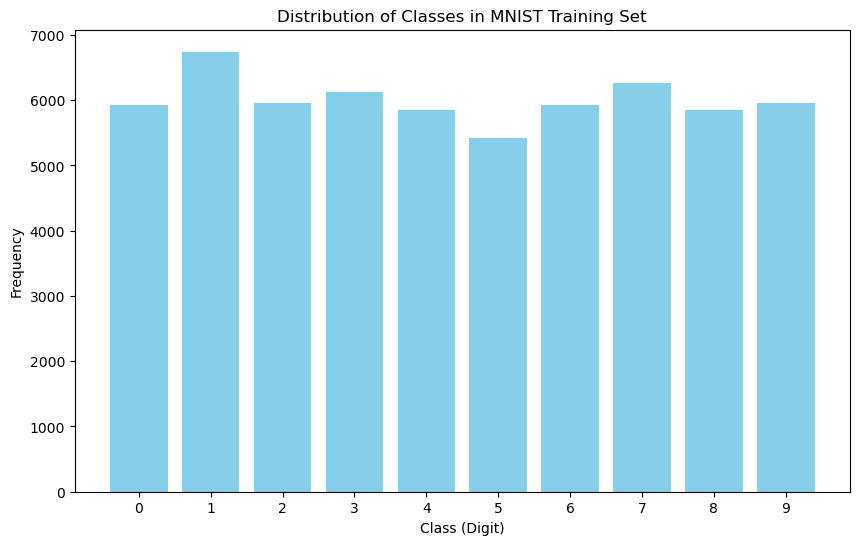

In [6]:
class_counts = np.bincount(y_train)
plt.figure(figsize=(10, 6))
plt.bar(range(10), class_counts, color='skyblue')
plt.title('Distribution of Classes in MNIST Training Set')
plt.xlabel('Class (Digit)')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.show()


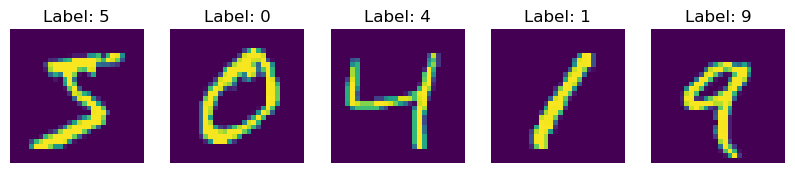

In [7]:
num_images = 5
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


In [8]:
img = cv.imread(r"Test4.png",0)

ret3, th3 = cv.threshold(img, 0, 255,cv.THRESH_OTSU)

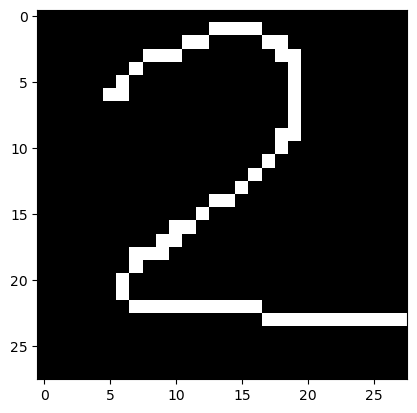

In [9]:
plt.imshow(th3, cmap='gray')
plt.show()

## Step5: Train the Model


In [10]:
# scale data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Add dropout after max-pooling
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout before output layer
model.add(Dense(10, activation='softmax'))


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.8828 - loss: 0.3702 - val_accuracy: 0.9839 - val_loss: 0.0492
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9762 - loss: 0.0840 - val_accuracy: 0.9871 - val_loss: 0.0385
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9816 - loss: 0.0608 - val_accuracy: 0.9874 - val_loss: 0.0379
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9843 - loss: 0.0508 - val_accuracy: 0.9905 - val_loss: 0.0306
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9862 - loss: 0.0426 - val_accuracy: 0.9894 - val_loss: 0.0333
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9884 - loss: 0.0379 - val_accuracy: 0.9911 - val_loss: 0.0300
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9899 - loss: 0.0328 - val_accuracy: 0.9907 - val_loss: 0.0324
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9904 -

##  Step6:Model Evaluation

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))


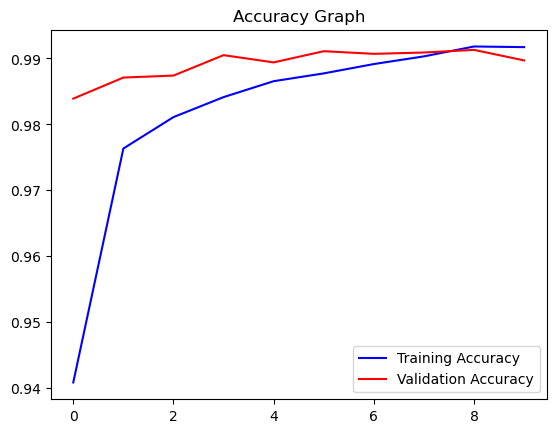

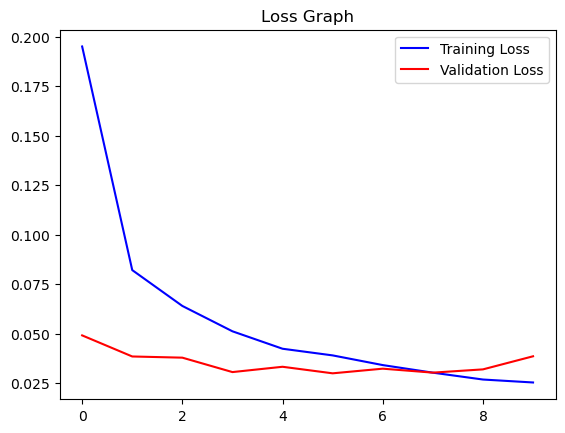

In [16]:
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()


## test the model

In [17]:
# Save the model with the .h5 extension
model.save('Number_classification.h5')

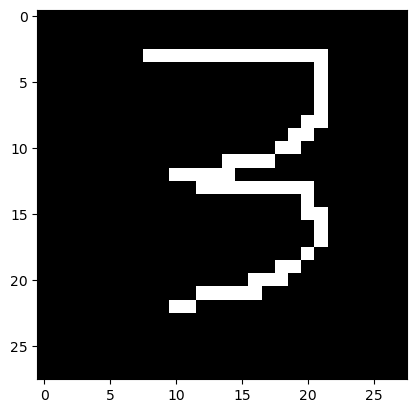

In [34]:
img = cv.imread(r"Test1.png",0)
plt.imshow(img, cmap='gray')
plt.show()


In [35]:

predictions_single = model.predict(np.array([img]))
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [36]:
predicted_label = np.argmax(predictions_single)
print(predicted_label)

3


In [21]:
num=np.argmax(predictions_single)
if num%2==0:
    print('is even number')
else:
    print('is odd number')

is odd number
